<a href="https://colab.research.google.com/github/Nowshin1077/Practice-projects-AI_ML_DL/blob/main/PCOS_Diagnosis_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Project name: *Polycystic ovary syndrome (PCOS) Diagnosis using ML(logistic regression)*
- Dataset information: *https://www.kaggle.com/code/ananyasingh008/pcos-diagnosis/data *


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from warnings import filterwarnings
filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
df_inf=pd.read_csv("/content/drive/MyDrive/Practice Projects/YT Tutorials/PCOS/PCOS_infertility.csv")
df_noinf=pd.read_excel("/content/drive/MyDrive/Practice Projects/YT Tutorials/PCOS/PCOS_data_without_infertility.xlsx",sheet_name="Full_new")
df_inf.shape

(541, 6)

In [3]:
df_noinf.shape

(541, 45)

In [4]:
df_inf.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [5]:
df_noinf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


**Feature Selection**
----------------------

In [6]:
#Identifying Features which have more than 0.40 correlation with PCOS(Y/N)

corr_features=df_noinf.corrwith(df_noinf["PCOS (Y/N)"]).abs().sort_values(ascending=False)
#features with correlation more than 0.4
corr_features=corr_features[corr_features>0.4].index
corr_features

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)'],
      dtype='object')

In [7]:
df_noinf=df_noinf[corr_features]
df_noinf.head()

,PCOS (Y/N),Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I)
0,0.0,3.0,3.0,0.0,0.0,0.0,2.0
1,0.0,5.0,3.0,0.0,0.0,0.0,2.0
2,1.0,15.0,13.0,0.0,0.0,0.0,2.0
3,0.0,2.0,2.0,0.0,0.0,0.0,2.0
4,0.0,4.0,3.0,0.0,0.0,0.0,2.0


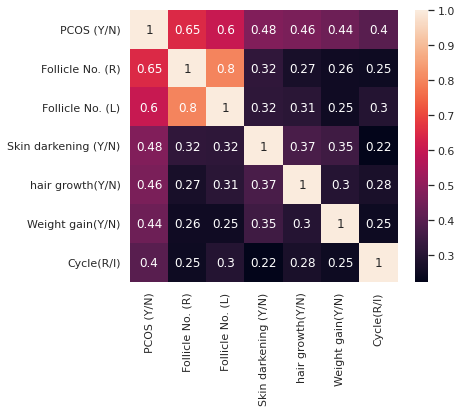

In [8]:
plt.figure(figsize=(6,5))
sns.heatmap(df_noinf.corr(), annot=True)
plt.show()

In [9]:
y=df_noinf['PCOS (Y/N)']
X=df_noinf.drop(['PCOS (Y/N)'], axis=1)

**Train-Test Split**
---------------------

In [10]:
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.2)

**Model Training**
--------------------

In [11]:
model=LogisticRegression()
model.fit(X_train,y_train)
print(f"Score in Train Data : {model.score(X_train,y_train)}")

Score in Train Data : 0.9097222222222222


**Prediction**
---------------

In [12]:
y_pred=model.predict(X_test)

**Results**
-------------

In [13]:
print(f"Score in Test Data : {model.score(X_test,y_test)}")

cm=confusion_matrix(y_test, y_pred)
p_right=cm[0][0]+cm[1][1]
p_wrong=cm[0][1]+cm[1][0]

print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")
cm

Score in Test Data : 0.8990825688073395
Right classification : 98
Wrong classification : 11


array([[70,  5],
       [ 6, 28]])